# Анализ взаимодействия пользователей с карточками Яндекс.Дзен

# Выгрузка данных

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

!pip install psycopg2
!pip install sqlalchemy 

import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-****', # пароль
            'host': '****-wco*****yxfsf3fs.mdb.yandexcloud.net',
            'port': ****, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

query = ''' SELECT *
            FROM dash_visits
        '''

dash_visits = pd.io.sql.read_sql(query, con = engine)

# Общая информация о данных

In [2]:
dash_visits.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


In [3]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


# Предобработка данных

In [4]:
dash_visits.duplicated().sum()

0

In [5]:
for column in ['item_topic','source_topic','age_segment']:
    print('Уникальные значени в', column,':')
    print(dash_visits[column].unique())
    print('-----------------')

Уникальные значени в item_topic :
['Деньги' 'Дети' 'Женская психология' 'Женщины' 'Здоровье' 'Знаменитости'
 'Интересные факты' 'Искусство' 'История' 'Красота' 'Культура' 'Наука'
 'Общество' 'Отношения' 'Подборки' 'Полезные советы' 'Психология'
 'Путешествия' 'Рассказы' 'Россия' 'Семья' 'Скандалы' 'Туризм' 'Шоу'
 'Юмор']
-----------------
Уникальные значени в source_topic :
['Авто' 'Деньги' 'Дети' 'Еда' 'Здоровье' 'Знаменитости' 'Интерьеры'
 'Искусство' 'История' 'Кино' 'Музыка' 'Одежда' 'Полезные советы'
 'Политика' 'Психология' 'Путешествия' 'Ремонт' 'Россия' 'Сад и дача'
 'Сделай сам' 'Семейные отношения' 'Семья' 'Спорт' 'Строительство'
 'Технологии' 'Финансы']
-----------------
Уникальные значени в age_segment :
['18-25' '26-30' '31-35' '36-40' '41-45' '45+']
-----------------


In [6]:
dash_visits['dt'].describe()

C:\Users\SupaLowa\AppData\Local\Temp\ipykernel_11400\2972088052.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dash_visits['dt'].describe()


count                   30745
unique                     17
top       2019-09-24 18:58:00
freq                     3383
first     2019-09-24 18:28:00
last      2019-09-24 19:00:00
Name: dt, dtype: object

In [7]:
dash_visits['visits'].describe()


count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

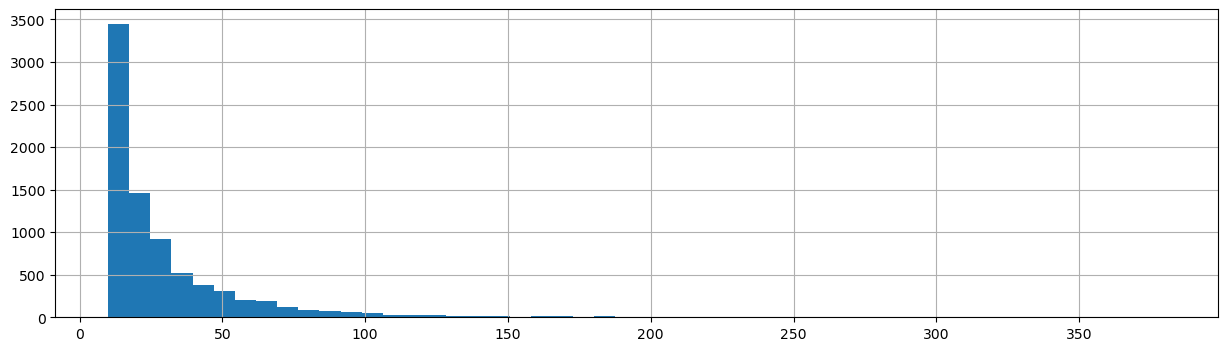

In [8]:
dash_visits['visits'].hist(bins=50, figsize=(15,4), range=(10,380));


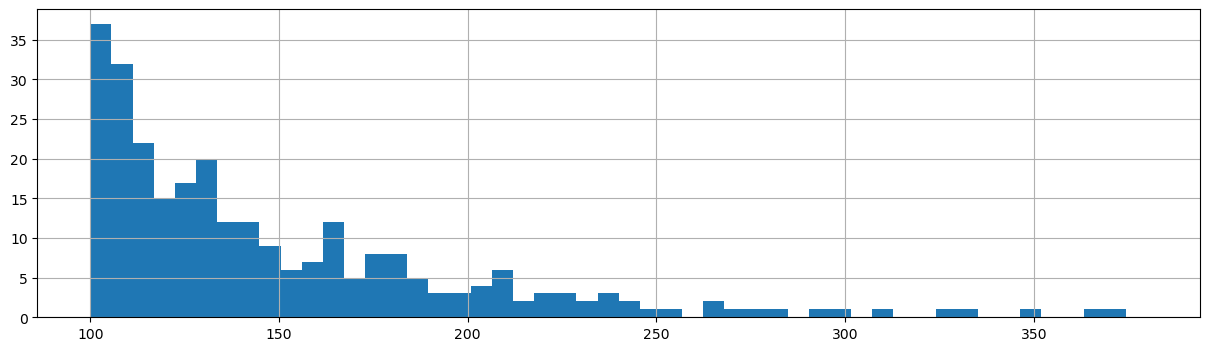

In [9]:
dash_visits['visits'].hist(bins=50, figsize=(15,4), range=(100,380));

**Вывод** 

Данные в порядке, можно приступать к экспорту данных и постройки дашборда 

# Экспорт данных в файл

In [10]:
dash_visits.to_csv('dash_visits.csv', index=False)

In [11]:
test = pd.read_csv('dash_visits.csv', sep = ',')
test.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


Ссылка на дашборд: <https://public.tableau.com/app/profile/supa.lowa/viz/Khomichu_Maxim_Project/sheet4?publish=yes>

Ссылка на презентацию: <https://disk.yandex.ru/i/OFLsWfbzGZ1yqA>

